In [1]:
#再變數後面按快捷鍵tab,有屬性或欄位提示
import math
import cv2
import h5py
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from scipy.io import loadmat
from keras.models import Sequential
from keras.models import Model, load_model
from keras.layers import Input, Conv2D, MaxPooling2D, ZeroPadding2D, Flatten, Dense, Dropout, BatchNormalization
from keras.utils import np_utils
from keras import optimizers, initializers
from keras import regularizers
from keras.datasets import mnist
from keras.backend.tensorflow_backend import set_session

Using TensorFlow backend.


In [2]:
def VGG16(input_shape = (48, 170, 1), classes = 19):
    
    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)
    
    X = Conv2D(64, (3, 3), input_shape=input_shape, activation='relu', padding='same', kernel_initializer = initializers.he_normal(seed=0))(X)
    X = Conv2D(64, (3, 3), input_shape=input_shape, activation='relu', padding='same', kernel_initializer = initializers.he_normal(seed=0))(X)
    X = BatchNormalization()(X)
    X = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(X)
    X = Dropout(0.1)(X)
   
    X = Conv2D(128, (3, 3), input_shape=input_shape, activation='relu', padding='same', kernel_initializer = initializers.he_normal(seed=0))(X)
    X = Conv2D(128, (3, 3), input_shape=input_shape, activation='relu', padding='same', kernel_initializer = initializers.he_normal(seed=0))(X)
    X = BatchNormalization()(X)
    X = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(X)
    X = Dropout(0.15)(X)

    X = Conv2D(256, (3, 3), input_shape=input_shape, activation='relu', padding='same', kernel_initializer = initializers.he_normal(seed=0))(X)
    X = Conv2D(256, (3, 3), input_shape=input_shape, activation='relu', padding='same', kernel_initializer = initializers.he_normal(seed=0))(X)
    X = Conv2D(256, (3, 3), input_shape=input_shape, activation='relu', padding='same', kernel_initializer = initializers.he_normal(seed=0))(X)
    X = BatchNormalization()(X)
    X = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(X)
    X = Dropout(0.2)(X)
    
    X = Conv2D(512, (3, 3), input_shape=input_shape, activation='relu', padding='same', kernel_initializer = initializers.he_normal(seed=0))(X)
    X = Conv2D(512, (3, 3), input_shape=input_shape, activation='relu', padding='same', kernel_initializer = initializers.he_normal(seed=0))(X)
    X = Conv2D(512, (3, 3), input_shape=input_shape, activation='relu', padding='same', kernel_initializer = initializers.he_normal(seed=0))(X)
    X = BatchNormalization()(X)
    X = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(X)
    X = Dropout(0.25)(X)

    #flatten layer: 由於之前擷取特徵都用2維, 所以要加一個"平坦層"轉換成1維再丟進fully connected neural network
    X = Flatten()(X)
    
    X = Dense(512, activation='relu', kernel_initializer=initializers.he_normal(seed=0))(X)
    X = Dropout(0.2)(X)
    
    X0 = Dense(256, activation='relu', kernel_initializer=initializers.he_normal(seed=0))(X)
    X0 = BatchNormalization()(X0)
    X0 = Dropout(0.2)(X0)
    X0 = Dense(classes, activation='softmax', name='fc0_' + str(classes), kernel_initializer = initializers.glorot_uniform(seed=0))(X0)
    
    X1 = Dense(256, activation='relu', kernel_initializer=initializers.he_normal(seed=0))(X)
    X1 = BatchNormalization()(X1)
    X1 = Dropout(0.2)(X1)
    X1 = Dense(classes, activation='softmax', name='fc1_' + str(classes), kernel_initializer = initializers.glorot_uniform(seed=0))(X1)
    
    X2 = Dense(256, activation='relu', kernel_initializer=initializers.he_normal(seed=0))(X)
    X2 = BatchNormalization()(X2)
    X2 = Dropout(0.2)(X2)
    X2 = Dense(classes, activation='softmax', name='fc2_' + str(classes), kernel_initializer = initializers.glorot_uniform(seed=0))(X2)
    
    X3 = Dense(256, activation='relu', kernel_initializer=initializers.he_normal(seed=0))(X)
    X3 = BatchNormalization()(X3)
    X3 = Dropout(0.2)(X3)
    X3 = Dense(classes, activation='softmax', name='fc3_' + str(classes), kernel_initializer = initializers.glorot_uniform(seed=0))(X3)
    
    # Create model
    model = Model(inputs = X_input, outputs = [X0, X1, X2, X3], name='VGG16')
    
    return model

In [4]:
data = loadmat('../data/train')
data.keys()

dict_keys(['__version__', 'x_train', '__globals__', 'y_train', '__header__'])

In [5]:
X_train = data['x_train']
Y_train = data['y_train']
print("X_train shape :" , X_train.shape)
print("Y_train shape :" , Y_train.shape)

X_train shape : (5838, 48, 170)
Y_train shape : (5838, 4)


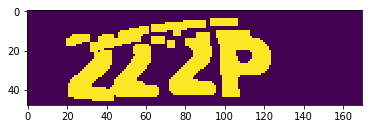

In [6]:
test = X_train[0]
kernel = np.ones((2,2), np.uint8)
#test = cv2.erode(test, kernel, iterations=3)
plt.imshow(test)

In [6]:
for i in range(X_train.shape[0]):
    X_train[i] = cv2.erode(X_train[i], kernel, iterations=3)

In [7]:
X_train = X_train[:, :, :, np.newaxis]
Y_tmp = np_utils.to_categorical(Y_train, num_classes=19)

training_data_num = 5838
x_train = X_train[0:training_data_num] / 255.
y_train = Y_tmp[0:training_data_num]
x_test = X_train[training_data_num:X_train.shape[0]] / 255.
y_test = Y_tmp[training_data_num:X_train.shape[0]]

print ("number of training examples = " + str(x_train.shape[0]))
print ("number of test examples = " + str(x_test.shape[0]))
print ("X_train shape: " + str(x_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(x_test.shape))
print ("Y_test shape: " + str(y_test.shape))

number of training examples = 5838
number of test examples = 0
X_train shape: (5838, 48, 170, 1)
Y_train shape: (5838, 4, 19)
X_test shape: (0, 48, 170, 1)
Y_test shape: (0, 4, 19)


In [8]:
model = VGG16(input_shape = (48, 170, 1), classes = 19)

In [9]:
model.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 48, 170, 1)   0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 54, 176, 1)   0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 54, 176, 64)  640         zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 54, 176, 64)  36928       conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_norm

In [10]:
train_history = model.fit(
    x_train, 
    [y_train[:, 0, :], y_train[:, 1, :], y_train[:, 2, :], y_train[:, 3, :]],
    validation_split = 0.05, 
    epochs = 40, 
    batch_size = 32)

Train on 5546 samples, validate on 292 samples
Epoch 1/40
5546/5546 [==============================] - 57s 10ms/step - loss: 12.8544 - fc0_19_loss: 3.1879 - fc1_19_loss: 3.2397 - fc2_19_loss: 3.2404 - fc3_19_loss: 3.1864 - fc0_19_acc: 0.0936 - fc1_19_acc: 0.0772 - fc2_19_acc: 0.0746 - fc3_19_acc: 0.0876 - val_loss: 11.1424 - val_fc0_19_loss: 2.7122 - val_fc1_19_loss: 2.8479 - val_fc2_19_loss: 2.8771 - val_fc3_19_loss: 2.7051 - val_fc0_19_acc: 0.1199 - val_fc1_19_acc: 0.1027 - val_fc2_19_acc: 0.0959 - val_fc3_19_acc: 0.1199
Epoch 2/40
5546/5546 [==============================] - 50s 9ms/step - loss: 11.2546 - fc0_19_loss: 2.6118 - fc1_19_loss: 2.9257 - fc2_19_loss: 2.9253 - fc3_19_loss: 2.7918 - fc0_19_acc: 0.1567 - fc1_19_acc: 0.1109 - fc2_19_acc: 0.1100 - fc3_19_acc: 0.1268 - val_loss: 10.0368 - val_fc0_19_loss: 2.1673 - val_fc1_19_loss: 2.6118 - val_fc2_19_loss: 2.7213 - val_fc3_19_loss: 2.5364 - val_fc0_19_acc: 0.2260 - val_fc1_19_acc: 0.1370 - val_fc2_19_acc: 0.1370 - val_fc3_19_ac

Epoch 18/40
5546/5546 [==============================] - 60s 11ms/step - loss: 0.2107 - fc0_19_loss: 0.0390 - fc1_19_loss: 0.0570 - fc2_19_loss: 0.0593 - fc3_19_loss: 0.0554 - fc0_19_acc: 0.9904 - fc1_19_acc: 0.9868 - fc2_19_acc: 0.9856 - fc3_19_acc: 0.9867 - val_loss: 0.4111 - val_fc0_19_loss: 0.1288 - val_fc1_19_loss: 0.1506 - val_fc2_19_loss: 0.0861 - val_fc3_19_loss: 0.0456 - val_fc0_19_acc: 0.9795 - val_fc1_19_acc: 0.9760 - val_fc2_19_acc: 0.9829 - val_fc3_19_acc: 0.9829
Epoch 19/40
5546/5546 [==============================] - 62s 11ms/step - loss: 0.1997 - fc0_19_loss: 0.0387 - fc1_19_loss: 0.0461 - fc2_19_loss: 0.0619 - fc3_19_loss: 0.0528 - fc0_19_acc: 0.9904 - fc1_19_acc: 0.9894 - fc2_19_acc: 0.9827 - fc3_19_acc: 0.9872 - val_loss: 0.3222 - val_fc0_19_loss: 0.1044 - val_fc1_19_loss: 0.1272 - val_fc2_19_loss: 0.0408 - val_fc3_19_loss: 0.0498 - val_fc0_19_acc: 0.9795 - val_fc1_19_acc: 0.9795 - val_fc2_19_acc: 0.9932 - val_fc3_19_acc: 0.9932
Epoch 20/40
5546/5546 [===============

In [11]:
#其實model.fit本來就會回傳記錄曲線圖
def show_train_history(train_history, train):
    plt.plot(train_history.history['fc0_19_' + train])
    plt.plot(train_history.history['fc1_19_' + train])
    plt.plot(train_history.history['fc2_19_' + train])
    plt.plot(train_history.history['fc3_19_' + train])
    plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['fc0_19_' + train, 'fc1_19_' + train, 'fc2_19_' + train, 'fc3_19_' + train], loc = 'center right')
    plt.show()

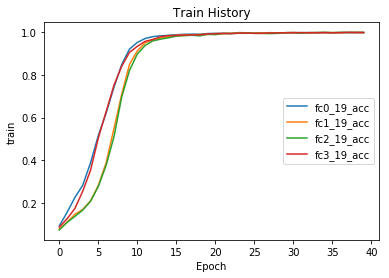

In [12]:
show_train_history(train_history, 'acc')

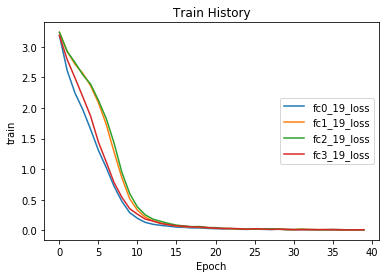

In [13]:
show_train_history(train_history, 'loss')

In [14]:
model.save('my_model.h5')

In [20]:
x_test = X_train[5546:X_train.shape[0]] / 255.
y_test = Y_tmp[5546:X_train.shape[0]]
score = model.evaluate(x_test, [y_test[:, 0, :], y_test[:, 1, :], y_test[:, 2, :], y_test[:, 3, :]], batch_size=32)
print('Total loss on Testing Set for fc0_19:', score[1])
print('Total loss on Testing Set for fc1_19:', score[2])
print('Total loss on Testing Set for fc2_19:', score[3])
print('Total loss on Testing Set for fc3_19:', score[4])
print('Accuracy of Testing Set for fc0_19:', score[5])
print('Accuracy of Testing Set for fc1_19:', score[6])
print('Accuracy of Testing Set for fc2_19:', score[7])
print('Accuracy of Testing Set for fc3_19:', score[8])

292/292 [==============================] - 2s 8ms/step
Total loss on Testing Set for fc0_19: 0.10080815502721498
Total loss on Testing Set for fc1_19: 0.15240124079848524
Total loss on Testing Set for fc2_19: 0.02923290952856729
Total loss on Testing Set for fc3_19: 0.01655589093949346
Accuracy of Testing Set for fc0_19: 0.9897260273972602
Accuracy of Testing Set for fc1_19: 0.9828767123287672
Accuracy of Testing Set for fc2_19: 0.9931506849315068
Accuracy of Testing Set for fc3_19: 0.9965753424657534


In [16]:
def predict_accuracy(model, x_test, y_test):
    correct_words = 0
    correct_img = 0
    
    y_predict = model.predict(x_test)
    for i in range(x_test.shape[0]):
        cnt = 0
        for j in range(4):
            label = y_predict[j]
            #label[i, :]代表第i筆資料的第j個字為各符號的機率
            if np.argmax(y_test[i, j, :]) == np.argmax(label[i, :]):
                correct_words += 1
                cnt += 1
        if cnt == 4:
            correct_img += 1
                
    total_words = x_test.shape[0]*4
    wrong_words = total_words - correct_words
    
    return wrong_words, correct_words / total_words, correct_img / x_test.shape[0]

In [21]:
wrong_words, word_acc, acc = predict_accuracy(model, x_test, y_test)
print(x_test.shape[0], '_pictures_total_wrong:', wrong_words)
print('one word accuracy:', word_acc)
print('accuracy:', acc)

292 _pictures_total_wrong: 11
one word accuracy: 0.990582191780822
accuracy: 0.9691780821917808


In [27]:
def show_result(model, X_train, x_test, y_test):
    dict = {0:'2', 1:'3', 2:'4', 3:'5', 4:'7', 5:'9', 6:'A', 7:'C', 8:'F', 9:'H', 10:'K', 11:'M', 12:'N', 13:'P', 14:'Q', 15:'R', 16:'T', 17:'Y', 18:'Z'}
    y_predict = model.predict(x_test[0:40])
    #印預測結果
    for i in range(40):
        print('predict=[ ', end='')
        cnt = 0
        for j in range(4):
            label = y_predict[j]
            c = np.argmax(label[i, :])
            
            if c != np.argmax(y_test[i, j, :]):
                cnt += 1
            
            if j < 3:
                print("'" + dict[c] + "', ", end='')
            else:
                print("'" + dict[c] + "']")
        
        print('answer=[ ', end='')
        for j in range(4):
            c = np.argmax(y_test[i, j, :])
            if j < 3:
                print("'" + dict[c] + "', ", end='')
            else:
                print("'" + dict[c] + "'], ", end='')
        print('wrong words =', cnt)
    #印預處理結果 
    fig = plt.figure(figsize=(30, 10))
    for i in range(5):
        fig.add_subplot(5, 1, i+1)
        plt.imshow(X_train[5546+i].reshape(48, 170))
    plt.show()

predict=[ 'F', 'Z', 'Z', 'Q']
answer=[ 'F', 'C', 'Z', 'Q'], wrong words = 1
predict=[ 'F', 'H', '5', '5']
answer=[ 'F', 'H', '5', '5'], wrong words = 0
predict=[ 'F', 'M', '5', '3']
answer=[ 'F', 'M', '5', '3'], wrong words = 0
predict=[ 'F', 'M', 'M', '7']
answer=[ 'F', 'M', 'M', '7'], wrong words = 0
predict=[ 'F', 'N', 'K', '9']
answer=[ 'F', 'N', 'K', '9'], wrong words = 0
predict=[ 'F', 'P', 'M', 'H']
answer=[ 'F', 'P', 'M', 'H'], wrong words = 0
predict=[ 'F', 'T', '4', '5']
answer=[ 'F', 'T', '4', '5'], wrong words = 0
predict=[ 'F', 'T', '5', 'A']
answer=[ 'F', 'T', '5', 'A'], wrong words = 0
predict=[ 'F', 'Y', '2', 'C']
answer=[ 'F', 'Y', '2', 'C'], wrong words = 0
predict=[ 'F', 'Z', '3', 'K']
answer=[ 'F', 'Z', '3', 'K'], wrong words = 0
predict=[ 'F', 'Z', 'Q', 'M']
answer=[ 'F', 'Z', 'Q', 'M'], wrong words = 0
predict=[ 'H', '2', 'H', '7']
answer=[ 'H', '2', 'H', '7'], wrong words = 0
predict=[ 'H', '5', '3', 'F']
answer=[ 'H', '3', '3', 'F'], wrong words = 1
predict=[ 'H

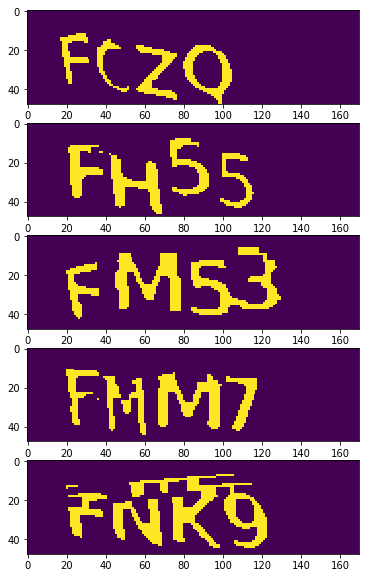

In [28]:
show_result(model, X_train, x_test, y_test)